<a href="https://colab.research.google.com/github/yuki0703-sudo/Research/blob/main/BallTracking_BGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
import scipy.ndimage as ndimage
from google.colab.patches import cv2_imshow
from numpy import uint8

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
print("{:03d}".format(200))

200


In [ ]:
import os
dir = '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1'
num_photo = sum(os.path.isfile(os.path.join(dir,name)) for name in os.listdir(dir))

for i in range(1,num_photo+1):
  if i < 680 or i>790:
    os.remove("/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/{:03d}.jpg".format(i))

In [ ]:
src_img_dir="/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1"

#src_img_dirがなかったら、srcフォルダを作成する
import os
import glob

if not os.path.exists(src_img_dir):
  os.makedirs(src_img_dir)


#フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
src_files=glob.glob("{}/*.jpg".format(src_img_dir))
src_files.sort()

for j,file in enumerate(src_files):
  print(file)
  oldpath = file
  newpath = os.path.join(src_img_dir,"{:03d}.jpg".format(j+1))
  os.rename(oldpath, newpath)

///mask


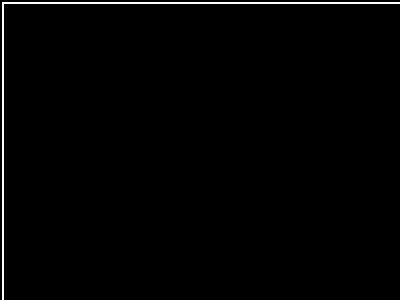

binary bgs image


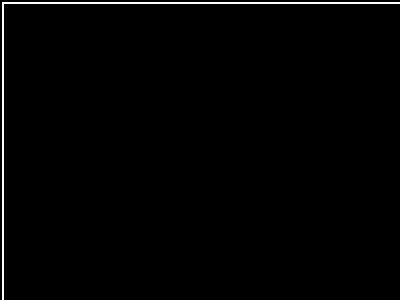

(array([[[  2,   2]],

       [[  2, 299]],

       [[  3, 299]],

       [[  3,   4]],

       [[  4,   3]],

       [[399,   3]],

       [[399,   2]]], dtype=int32),)
(115, 65)


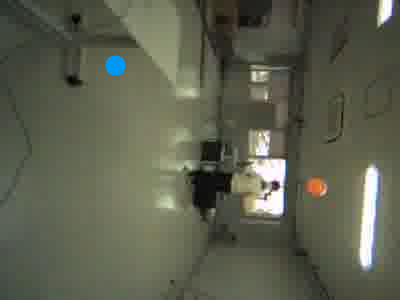

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import uint8

if __name__ == "__main__":

  #read image
  i=40
  kernel = np.zeros((5,5),np.uint8)
  #img_src1 = cv2.imread("/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_12-2/0100.jpg")
  #img_src2 = cv2.imread("/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220603/video/xiQ_20220603_12-2/0300.jpg")
  src_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1' ##Chnage here
  img_src = cv2.imread("{dir}/{index:03d}.jpg".format(dir= src_img_dir,index=(i+1)))
  #img_src = cv2.imread("{dir}/{index:03d}.jpg".format(dir= src_img_dir,index=(i)))
  fgbg = cv2.bgsegm.createBackgroundSubtractorMOG(history = 50)#,detect_shadow = False) #, varThreshold = 0.4)

  fgmask = fgbg.apply(img_src)
  fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
  #fgmask2 = fgbg.apply(img_src2)

  #display
  print("///mask")
  cv2_imshow(fgmask)
  #print("////second image mask")
  #cv2_imshow(fgmask2)
  #print("_____")

  #detected image
  #comparison image
  img_src = np.array(img_src,dtype=uint8)
  fgmask = np.array(fgmask,dtype=uint8)
      # グレースケールに変換する。
  gray_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
  #gray_fgmask = cv2.cvtColor(fgmask,cv2.COLOR_BGR2GRAY)

    # 2値化する
  #ret_src, bin_src = cv2.threshold(gray_src,1,255, cv2.THRESH_BINARY)
  ret_bgs, bin_bgs = cv2.threshold(fgmask,30,255, cv2.THRESH_BINARY)
  #for i in range(len(bin_src)):
   # for j in range(len(bin_src[1])):
    #  if bin_src[i][j] == 255
  #print("binary image")
  #cv2_imshow(bin_src)
  #cv2_imshow(img_src1)
  print("binary bgs image")
  cv2_imshow(bin_bgs)
  # 輪郭を抽出する。
  #contours_src, hierarchy_src = cv2.findContours(np.array(bin_src,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  contours_bgs, hierachy_bgs = cv2.findContours(np.array(bin_bgs, dtype = uint8),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 小さい輪郭は誤検出として削除する
    #contours = list(filter(lambda x: cv2.contourArea(x) <50, contours)
  
     #calculate area:
  area_src = 0
  area_bgs = 0
  count=0
  area_bgs = []
      #source image area
  print(contours_bgs)
  if contours_bgs:
      #for c in contours_bgs:
      #  area_src += cv2.contourArea(c)
          #bgs image area:
      for c in contours_bgs:
        area_bgs.append(cv2.contourArea(c))
        """
    if area_src!=0:
      print(area_src)
      print(area_bgs)
      ratio = (area_bgs/area_src)*10000
      """
        index = np.argmax(area_bgs)
        cnt = contours_bgs[index]

        mu=cv2.moments(c)
        x=int(mu["m10"]/mu["m00"])
        y=int(mu["m01"]/mu["m00"])
        print((x,y))
        cv2.circle(img_src,center=(x,y),radius=10,color=(243,152,0),thickness=-1)

  cv2_imshow(img_src)
#bg_diff_path = "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20220401/video/diff.jpg"
#cv2.imwrite(bg_diff_path,fgmask)
  """
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  """

In [ ]:
# calculate the center position from image :video
import cv2
import numpy as np
from IPython import display
from matplotlib import pyplot as plt
import time
from numpy import dtype,uint8
import scipy.ndimage as ndimage
import math
import glob
import os
import time

length = 40

#入力画像取得
#///////////////////////
src_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1' ##Chnage here
#//////////////////////

src_files=glob.glob("{}/*.jpg".format(src_img_dir))
src_files.sort()
print(src_files)
#画像の保存ディレクトリ
# Change here /////////////
dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/BGS'
#///////////////////////

if not os.path.exists(dst_img_dir):
  os.makedirs(dst_img_dir)

num = []
ratio = []

X = []
Y = []

t = 0

for i in range(1,len(src_files)+1): #index,components=enumerate(file)[]
  print(i)
  t1 = time.time()
  #read image
  img_src = cv2.imread("{dir}/{index:03d}.jpg".format(dir= src_img_dir,index=(i)))
  #img_src2 = cv2.imread("{dir}/{index:03d}.jpg".format(dir= src_img_dir,index=(i)))

  fgbg = cv2.bgsegm.createBackgroundSubtractorMOG(history = 60)

  #fgmask = fgbg.apply(img_src1)
  fgmask = fgbg.apply(img_src)

  #comparison image
  #img_src1 = np.array(img_src2,dtype=uint8)
  fgmask = np.array(fgmask,dtype=uint8)
  # グレースケールに変換する。
  #gray_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
  #gray_fgmask = cv2.cvtColor(fgmask,cv2.COLOR_BGR2GRAY)

# 2値化する
  #ret_src, bin_src = cv2.threshold(gray_src, 1, 255, cv2.THRESH_BINARY)
  ret_bgs, bin_bgs = cv2.threshold(fgmask, 1,  255,cv2.THRESH_BINARY)

# 輪郭を抽出する。
  #contours_src, hierarchy_src = cv2.findContours(np.array(bin_src,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  contours_bgs, hierachy_bgs = cv2.findContours(np.array(bin_bgs, dtype = uint8),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  area_bgs = []
  #source image area
  #print(bool(contours_bgs))
  #if bool(contours_bgs) == True:
      #for c in contours_bgs:
      #  area_src += cv2.contourArea(c)
          #bgs image area:
  for c in contours_bgs:
    area_bgs.append(cv2.contourArea(c))
  """
  if area_src!=0:
    print(area_src)
    print(area_bgs)
    ratio = (area_bgs/area_src)*10000
  """
  if area_bgs != []:
    index = np.argmax(area_bgs)
    cnt = contours_bgs[index]

    if mu["m00"] != 0:
      mu=cv2.moments(cnt)
      x=int(mu["m10"]/mu["m00"])
      y=int(mu["m01"]/mu["m00"])
    else:
      x = None
      y = None
  else:
        x = None
        y = None

  t2 = time.time()

  t += (t2-t1)

  X.append(x)
  Y.append(y)

  cv2.circle(img_src,center=(x,y),radius=10,color=(243,152,0),thickness=-1)
  save_dir = os.path.join(dst_img_dir,"{:03d}.jpg".format(i))
  cv2.imwrite(save_dir,img_src)

print("Process time for BGS:{:.1f}".format(len(src_files)/t)) #83.6Hz

['/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/001.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/002.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/003.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/004.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/005.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/006.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/007.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/008.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/009.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/010.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/011.jpg', '/content/gdrive/My Drive/YAMAKAWA_LAB/ObjectTracking/20221221/1/cam_1/012.jpg', '/content/gdrive/My Drive/Y

In [ ]:
print(X)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


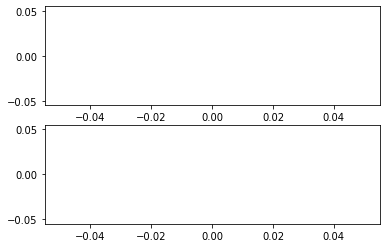

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2,1)

ax[0].plot(X)
ax[1].plot(Y)
plt.show()